In [1]:
##given performance in the previous page, where should I post next?
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd

filepath = "/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/code/"
post_type = 'link'
links_meta = "link_metadata_2016_2017.csv"
links_1hr_stats = "link_1_hour_stats_2016_2017.csv"
links_48hr_stats = "link_48_hour_stats_2016_2017.csv"

# df = pd.read_csv("../code/" + post_type + '_metadata_06_2016.csv')
meta_df = pd.read_csv(filepath + links_meta)
stats_df = pd.read_csv(filepath + links_1hr_stats)
stats_df = stats_df.drop('created_at', 1)
stats_df = stats_df.sort_values('stats_date', ascending = False).drop_duplicates(subset=['external_id'], keep = 'last')

train = pd.merge(meta_df, stats_df, on = ['external_id'], how = 'right')

###get 2 day stats
links_48hr_stats = "link_48_hour_stats_2016_2017.csv"
day2_stats_df = pd.read_csv(filepath + links_48hr_stats)
day2_stats_df = day2_stats_df.sort_values('stats_date', ascending = False).drop_duplicates(subset=['external_id'], keep = 'last')
day2_stats_df = day2_stats_df[['external_id', 'stats_date', 'consumptions_by_type__link_clicks', 'stories_by_action_type__share']]
new_cols = ['external_id', 'twoday_stats_date', 'twoday_consumptions_by_type__link_clicks', 'twoday_stories_by_action_type__share']
day2_stats_df.columns = new_cols
train = pd.merge(train, day2_stats_df, on = ['external_id'], how = 'right')

###
# temp = train
# train_grouped = train.groupby(['buzz_id']).agg({'created_at':'min'})
# train_grouped = train_grouped.reset_index()
# train_grouped = train_grouped.rename(columns={'created_at':'first_post'})
# df = pd.merge(train, train_grouped, how='left', on=['buzz_id'])
# df = df[df['created_at'] == df['first_post']]
# train = temp
###
df = train
df = df.drop('parent_external_id', 1)
df = df.dropna()
#get 48 hour stats

# df = df.sort_values('stats_date', ascending = False).drop_duplicates(subset=['external_id'], keep = 'last')
# df = df.sort_values('twoday_stats_date', ascending = False).drop_duplicates(subset=['external_id'], keep = 'last')
df.to_csv('radshift_links_2016_2017.csv', index = None)
df.shape

(85591, 22)

In [3]:
###get cross-posting info for videos!!!! 
import math 

filepath = "/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/code/"
# train = pd.read_csv('../code/jan_may_2017_links_cross_posting_info.csv')
train = pd.read_csv('radshift_links_2016_2017.csv')

df = train.sort_values('created_at', ascending = False).drop_duplicates(subset=['buzz_id', 'external_id'], keep = 'last')

all_pages = list(df.page.unique())
print("Total pages considered: ", len(all_pages))

def get_cross_posted_pages(x):
        t = df[df.buzz_id == x].sort_values('created_at', ascending = 1)
        return t.page.unique()

df['cross_promotion_pages'] = df['buzz_id'].apply(get_cross_posted_pages)

def generate_cat_pages(x, y):
        if(y in x):
            return list(x).index(y) + 1
        else:
            return math.inf

###categorical features for pages where the link was shared
for pag in all_pages:
#     print("Getting for ", pag)
    df[pag] = df['cross_promotion_pages'].apply(generate_cat_pages, y = pag)

df.to_csv('radshift_links_cross_posting_info.csv', index = False)
df

Total pages considered:  85


KeyboardInterrupt: 

In [ ]:
###get the previous page the video was posted on!
train = pd.read_csv('radshift_links_cross_posting_info.csv')

def get_previous(X):
#     print("Start")
    buzzid = train[train['external_id'] == X]['buzz_id'].values[0]
    cross_posts = list(train[train['buzz_id'] == buzzid].sort_values(['created_at'], ascending = True)['external_id']) 
    print(X, ":", buzzid, ":", len(cross_posts))
#     print(cross_posts)
    index = cross_posts.index(X)
    if index == 0:
        return -1
#         return "-1"
    else:
        return cross_posts[index - 1]

df['previous_external_id'] = df['external_id'].apply(get_previous)
df.to_csv('radshift_links_previous_page_info.csv', index = False)

491452930867938_1703904459622773 : 4530021.0 : 7
21898300328_10156238011075329 : 4550585.0 : 2
1318800798260799_2246444568829746 : 4545516.0 : 5
224750834524198_480436385622307 : 4550292.0 : 6
1644111839212044_1770818309874729 : 4559436.0 : 1
1412984988933193_2028855667346119 : 4559204.0 : 1
697789576948199_1508493642544451 : 4532828.0 : 1
336350663190375_827385237420246 : 4391943.0 : 4
229476530583896_628385404026338 : 4553389.0 : 3
21898300328_10156238312255329 : 4551436.0 : 5
1412984988933193_2028859167345769 : 4547771.0 : 5
1433294486996353_1899731077019356 : 4559534.0 : 1
294474594013113_1263194120474484 : 4556182.0 : 1
1412984988933193_2028857480679271 : 4543205.0 : 3
666255463425866_1582916158426454 : 4557080.0 : 1
21898300328_10156241362805329 : 4559238.0 : 4
1412406255640941_1924653191082909 : 4555219.0 : 1
454910924645380_988098937993240 : 4559474.0 : 1
1318800798260799_2246443258829877 : 4549339.0 : 1
1412984988933193_2028855487346137 : 4559252.0 : 1
21898300328_101562403197

In [ ]:
print(1)

In [24]:
all_df = pd.read_csv('radshift_links_cross_posting_info.csv')
all_pages = all_df['page'].unique()

alt_inf = len(all_pages) + 1
all_df = all_df.replace(math.inf, alt_inf)

pre_df = pd.read_csv('radshift_links_previous_page_info.csv')

pre_df = pre_df[~(pre_df['previous_external_id'] == "-1")]
pre_df = pre_df[['external_id','previous_external_id']]
pre_df.columns = ['next_external_id', 'external_id']
pre_df = pd.merge(pre_df, all_df, on="external_id", how = "inner")

features = [
       'next_external_id', 
       'external_id', 
       'page',
       'title',
        'buzz_id',
        'created_at',
       'stats_date',
       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks',
       'reactions_like_total',
       'stories_by_action_type__comment',
       'stories_by_action_type__like',
       'stories_by_action_type__share', 
        'engaged_fan',
       'fan_reach', 
    'impressions',
       'impressions_fan',
        'twoday_stats_date',
       'twoday_consumptions_by_type__link_clicks',
       'twoday_stories_by_action_type__share',
        ]

for pg in all_pages:
    features.append(pg)

pre_df = pre_df[features]

post_df = all_df[['external_id', 'page', 'consumptions_by_type__link_clicks', 'stories_by_action_type__share']]
post_df.columns = ['next_external_id', 'next_page', 'next_clicks', 'next_shares']

train_df = pd.merge(pre_df, post_df, on="next_external_id", how = "inner")

In [26]:
train_df.to_csv('radshift-links-previous-to-next-page-info.csv', index = False)

In [45]:
train_df = pd.read_csv('radshift-links-previous-to-next-page-info.csv')

one_hour_features = [
       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks',
       'reactions_like_total',
       'stories_by_action_type__comment',
       'stories_by_action_type__like',
       'stories_by_action_type__share', 
        'engaged_fan',
       'fan_reach', 
    'impressions',
       'impressions_fan',
                ]

two_day_features = [
       'twoday_consumptions_by_type__link_clicks',
       'twoday_stories_by_action_type__share',
]

all_pages = train_df['page'].unique()
cross_promotion_features = all_pages

# train_features = one_hour_features
# print("ONLY 1 HOUR PERFORMANCE IN PREVIOUS PAGE")
# print('SHARES:')
# res = ols(y = train_df['next_shares'], x = train_df[train_features])
# print(res)
# print('CLICKS:')
# res = ols(y = train_df['next_clicks'], x = train_df[train_features])
# print(res)
train_features = one_hour_features + page_infos# + cross_promotion_features
for feat in cross_promotion_features:
    train_features.append(feat)
train_features

['consumptions_by_type__link_clicks',
 'consumptions_by_type__other_clicks',
 'reactions_like_total',
 'stories_by_action_type__comment',
 'stories_by_action_type__like',
 'stories_by_action_type__share',
 'engaged_fan',
 'fan_reach',
 'impressions',
 'impressions_fan',
 'page',
 'next_page',
 'Buy Me That',
 'BuzzFeed Style',
 'BuzzFeed',
 'BuzzFeed Video',
 'BuzzFeed Philippines',
 'BuzzFeed Food',
 'Tasty',
 'BuzzFeed Parents',
 'BuzzFeed UK News',
 'BuzzFeed Australia',
 'BuzzFeed IRL',
 'BuzzFeed Animals',
 'BuzzFeed UK',
 'Obsessed by BuzzFeed',
 'SOML',
 'BuzzFeed News',
 'BuzzFeed Entertainment',
 'Quizzes En Español',
 'BuzzFeed México',
 'BuzzFeed DIY',
 'BuzzFeed Books',
 'BuzzFeed Quiz',
 'BuzzFeed World',
 'BuzzFeed Rewind',
 'BuzzFeed LGBT',
 'BuzzFeed Celeb',
 'BuzzFeed Geeky',
 'BuzzFeed Ladylike',
 'BuzzFeed Español',
 'BuzzFeed Science',
 'Cheeky',
 'BuzzFeed Health',
 'BuzzFeed Community',
 'BuzzFeed Brasil',
 'BuzzFeed India',
 'Cocoa Butter',
 'BuzzFeed Politics',


In [65]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

print("LINEAR REGRESSION!")

print("With log-scaled performance stats, page infos, and also cross-promotion order included!")

page_infos = ['page', 'next_page']

# train_features = one_hour_features
train_features = one_hour_features + page_infos
# train_features = one_hour_features + page_infos + cross_promotion_features
# train_features = cross_promotion_features + one_hour_features
# train_features = two_day_features + one_hour_features + cross_promotion_features


# cross_promote = 0
cross_promote = 1

if cross_promote == 1:
    for feat in cross_promotion_features:
        train_features.append(feat)

for feats in (one_hour_features):
    train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1).astype(int)
train_df['share_bucket'] = np.log(train_df['next_shares']+1).astype(int)

print("No. of data-points = ", len(train_df))

# y_clicks = train_df['next_clicks']
# y_share = train_df['next_shares']
y_clicks = train_df['clicks_bucket']
y_share = train_df['share_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]
####convert page_infos into dummies
X = pd.get_dummies(data = X, columns=['page', 'next_page'])

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

clicks_accuracy = []
clicks_error = []
shares_accuracy = []
shares_error = []

for train_index, test_index in kf.split(X):
#     print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    shares_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    shares_error.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
    fold += 1
print("Shares performance: Accuracy = ", np.mean(shares_accuracy), " ; Error (/100) = ", np.mean(shares_error))
print("Clicks performance: Accuracy = ", np.mean(clicks_accuracy), " ; Error (/100) = ", np.mean(clicks_error))

####With CP: 
# LINEAR REGRESSION!
# With log-scaled performance stats, and also cross-promotion features and page infos!
# No. of data-points =  38769
# Shares performance: Accuracy =  0.722172551317  ; Error (/100) =  0.229542957418
# Clicks performance: Accuracy =  0.821868954434  ; Error (/100) =  0.0799708999123
##### Without CP:
# LINEAR REGRESSION!
# With log-scaled performance stats, and page infos!
# No. of data-points =  38769
# Shares performance: Accuracy =  0.688512961191  ; Error (/100) =  0.244403826664
# Clicks performance: Accuracy =  0.808948132485  ; Error (/100) =  0.0828610824224

# TREE REGRESSION! (max_depth = 10)
# Raw counts of performance stats with page names included!
# No. of data-points =  38769
# Shares performance: Accuracy =  0.796536741688  ; Error (/100) =  0.565827496586
# Clicks performance: Accuracy =  0.806248134544  ; Error (/100) =  0.419854336475

LINEAR REGRESSION!
With log-scaled performance stats, page infos, and also cross-promotion order included!
No. of data-points =  38769
Shares performance: Accuracy =  0.722084604915  ; Error (/100) =  0.229542933169
Clicks performance: Accuracy =  0.821802405936  ; Error (/100) =  0.0799708438817


In [66]:
# from sklearn import linear_model
# clf = linear_model.LinearRegression()
# print("LINEAR REGRESSION!")

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth = 10)
print("TREE REGRESSION!")

train_df = pd.read_csv('radshift-links-previous-to-next-page-info.csv')
all_pages = list(train_df.page.unique())

print("Raw counts of performance stats with page names, and also cross-promotion order included!")
# print("WITH cross-promotion features")

page_infos = ['page', 'next_page']

# train_features = one_hour_features
# train_features = one_hour_features + page_infos + cross_promotion_features
train_features = one_hour_features + page_infos
# train_features = cross_promotion_features + one_hour_features

# cross_promote = 0
cross_promote = 1

if cross_promote == 1:
    for feat in cross_promotion_features:
        train_features.append(feat)
        
# train_features = two_day_features + one_hour_features + cross_promotion_features

# for feats in (one_hour_features):
#     train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1).astype(int)
train_df['share_bucket'] = np.log(train_df['next_shares']+1).astype(int)

print("No. of data-points = ", len(train_df))

y_clicks = train_df['next_clicks']
y_share = train_df['next_shares']
# y_clicks = train_df['clicks_bucket']
# y_share = train_df['share_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]
####convert page_infos into dummies
X = pd.get_dummies(data = X, columns=['page', 'next_page'])

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

clicks_accuracy = []
clicks_error = []
shares_accuracy = []
shares_error = []

for train_index, test_index in kf.split(X):
#     print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    shares_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    shares_error.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
    fold += 1
print("Shares performance: Accuracy = ", np.mean(shares_accuracy), " ; Error (/100) = ", np.mean(shares_error))
print("Clicks performance: Accuracy = ", np.mean(clicks_accuracy), " ; Error (/100) = ", np.mean(clicks_error))

TREE REGRESSION!
Raw counts of performance stats with page names, and also cross-promotion order included!
No. of data-points =  38769
Shares performance: Accuracy =  0.784106343265  ; Error (/100) =  0.564984113936
Clicks performance: Accuracy =  0.804186075468  ; Error (/100) =  0.420199154196


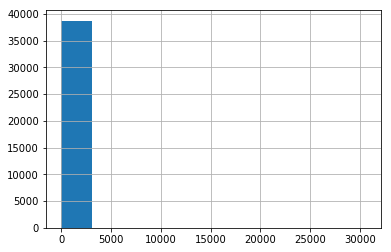

In [64]:
y_share.hist()

In [4]:
###TASK 1 - LINKS
import pandas as pd
# vf_stats = pd.read_csv('link_stats_jun20.csv')
lf_meta = pd.read_csv('radshift_links_2016_2017.csv')

all_pages = lf_meta['page'].unique()

###which page is best fit for a given just the title - 
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import numpy as np

pages = []
num_links = []
average_acc = []
average_pre = []
average_rec = []
average_f1 = []

cv_folds = 10
results = pd.DataFrame()
page_clf = []

df = lf_meta[['title', 'page']].dropna()

for test_page in all_pages:
#     test_page = "BuzzFeed"
    X_1 = df[df.page == test_page]
    X_0 = df[~(df.page == test_page)].sample(n=len(X_1))
    if len(X_1) < 2.5*cv_folds:
        continue
    X_1 = X_1[['title', 'page']]
    X_0 = X_0[['title', 'page']]
    X_all = pd.concat([X_1, X_0])
    
#     print(len(X_1), ":", len(X_0))
    def get_class(X, page):
        if X == page:
            return 1
        else:
            return 0
    X_all['class'] = X_all['page'].apply(get_class, page = test_page)
#     X_all = X_all.dropna()
    text_clf = Pipeline([
                         ('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
#                          ('featselect', SelectKBest(k = 100)),
                         ('clf', MultinomialNB()),
#                          ('clf', LinearSVC()),
#                          ('clf', RandomForestClassifier()),
#                          ('clf', LogisticRegression()),
    ])
    fold = 0
    kf = KFold(n_splits = cv_folds, shuffle = True)

    accuracy = []
    precision = []
    recall = []
    fscore = []

    X = X_all['title']
    y = X_all['class']

    for train_index, test_index in kf.split(X):
#         print("Fold = ", fold)
        fold+= 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        text_clf.fit(X_train, y_train)
        y_pred = text_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec, rec, fs, sup = precision_recall_fscore_support(y_test, y_pred, average='macro')
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        fscore.append(fs)
#     print("Page: ", test_page, "#links: ", len(X_1), "Accuracy: ", np.mean(accuracy), "Precision: ", np.mean(precision), "Recall: ", np.mean(recall), "Fscore:", np.mean(fscore))
    num_links.append(len(X_1))
    average_acc.append(np.mean(accuracy))
    average_pre.append(np.mean(precision))
    average_rec.append(np.mean(recall))
    average_f1.append(np.mean(fscore))
    pages.append(test_page)
    page_clf.append(text_clf)
results['page'] = pages
results['num_links'] = num_links
results['accuracy'] = average_acc
results['precision'] = average_pre
results['recall'] = average_rec
results['fscore'] = average_f1

results.mean()

### First page promotion
###Total data points: 85591
# num_pages: 85
# num_links    1448.000000
# accuracy        0.789186
# precision       0.811785
# recall          0.792267
# fscore          0.778326

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


num_links    1448.000000
accuracy        0.789472
precision       0.814641
recall          0.792515
fscore          0.778743
dtype: float64

In [5]:
#####Query by page and title of link - Should a link with this title be posted on this BF page?
# q_page = "LOLA"
q_page = "BuzzFeed Quiz"
# q_page = "BuzzFeed Japan"
q_test = ["Find Out What your spirit animal is?"]  ###list of titles you wanna query

max_prob = 0
max_page = ""

print("Finding best first page for item titled: ", q_test)

for pg in all_pages:
    try:
        clf = page_clf[pages.index(pg)]
    except:
#         print("Woops, the model for page ", pg, " is still in the works!")
        continue
        
    prob = clf.predict_proba(q_test)[0][1]
    print(pg, prob)
    if prob > max_prob:
        max_prob = prob
        max_page = pg
    
print("Best fit for this link would be: ", max_page, "; prob = ", max_prob)

Finding best first page for item titled:  ['Find Out What your spirit animal is?']
BuzzFeed Rewind 0.342257324623
BuzzFeed UK 0.473565774024
BuzzFeed 0.597574269854
BuzzFeed Food 0.46615495809
BuzzFeed Entertainment 0.354519268708
BuzzFeed Books 0.378874223551
BuzzFeed Science 0.667332948383
BuzzFeed Parents 0.438262887215
Tasty 0.414653103905
BuzzFeed Australia 0.558710591372
BuzzFeed Animals 0.868463945356
BuzzFeed UK Politics 0.250663890624
BuzzFeed Quiz 0.917481531416
BuzzFeed France 0.00758648944875
BuzzFeed DIY 0.581385848573
BuzzFeed Brasil 0.00465833221138
Tasty Demais 0.134501985627
BuzzFeed Español 0.0101195175498
BuzzFeed Philippines 0.707167968817
BuzzFeed Health 0.437000238559
Buy Me That 0.257984313576
BuzzFeed India 0.421896056842
BuzzFeed Ladylike 0.634577588765
BuzzFeed Community 0.698213935875
BuzzFeed Deutschland 0.0264108832956
SOML 0.465964505921
BuzzFeed Scotland 0.477138283879
BuzzFeed News 0.364062724472
Quizzes En Español 0.128890810014
BuzzFeed Video 0.6772919

In [21]:
###TASK 1 - LINKS
import pandas as pd
# vf_stats = pd.read_csv('link_stats_jun20.csv')
lf_meta = pd.read_csv('radshift_links_2016_2017.csv')

all_pages = lf_meta['page'].unique()

##### train only on the titles of top performers
top_percent = 75

print("Training only on top performing post titles (K  = ", top_percent ,"%) based on 1st hour shares!!!")

###which page is best fit for a given just the title - 
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import numpy as np

pages = []
num_links = []
average_acc = []
average_pre = []
average_rec = []
average_f1 = []

cv_folds = 10
results = pd.DataFrame()
page_clf = []

df = lf_meta[['title', 'page', 'stories_by_action_type__share']].dropna()

# df = train_df[['title', 'display_name', 'stories_by_action_type__share']].dropna()
# df = train_df[['title', 'page']].dropna()
df.columns = ['title', 'page', 'shares']

# X_1 = df[df.page == test_page]

##### train only on the titles of top performers
# top_percent = 25
# print("Training only on top performing post titles based on 1st hour shares!!!")
# tot = len(X_1)
# top_performers = tot * top_percent/ 100
# X_1 = X_1.sort_values('shares', ascending = False)[:top_performers]
# X_0 = df[~(df.page == test_page)].sample(n=len(X_1))

# X_all = pd.concat([X_1, X_0])
# X_all = X_all.drop(['shares'], axis = 1)


for test_page in all_pages:
#     test_page = "BuzzFeed"
    X_1 = df[df.page == test_page]
    if len(X_1) < 2.5*cv_folds:
        continue

    tot = len(X_1)
    top_performers = int(tot * top_percent/ 100)
    X_1 = X_1.sort_values('shares', ascending = False)[:top_performers]

    X_0 = df[~(df.page == test_page)].sample(n=len(X_1))
    X_1 = X_1[['title', 'page']]
    X_0 = X_0[['title', 'page']]
    X_all = pd.concat([X_1, X_0])
#     X_all = X_all.drop(['shares'], axis = 1)

#     print(len(X_1), ":", len(X_0))
    def get_class(X, page):
        if X == page:
            return 1
        else:
            return 0
    X_all['class'] = X_all['page'].apply(get_class, page = test_page)
#     X_all = X_all.dropna()
    text_clf = Pipeline([
                         ('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
#                          ('featselect', SelectKBest(k = 100)),
                         ('clf', MultinomialNB()),
#                          ('clf', LinearSVC()),
#                          ('clf', RandomForestClassifier()),
#                          ('clf', LogisticRegression()),
    ])
    fold = 0
    kf = KFold(n_splits = cv_folds, shuffle = True)

    accuracy = []
    precision = []
    recall = []
    fscore = []

    X = X_all['title']
    y = X_all['class']

    for train_index, test_index in kf.split(X):
#         print("Fold = ", fold)
        fold+= 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        text_clf.fit(X_train, y_train)
        y_pred = text_clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec, rec, fs, sup = precision_recall_fscore_support(y_test, y_pred, average='macro')
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        fscore.append(fs)
#     print("Page: ", test_page, "#links: ", len(X_1), "Accuracy: ", np.mean(accuracy), "Precision: ", np.mean(precision), "Recall: ", np.mean(recall), "Fscore:", np.mean(fscore))
    num_links.append(len(X_1))
    average_acc.append(np.mean(accuracy))
    average_pre.append(np.mean(precision))
    average_rec.append(np.mean(recall))
    average_f1.append(np.mean(fscore))
    pages.append(test_page)
    page_clf.append(text_clf)
results['page'] = pages
results['num_links'] = num_links
results['accuracy'] = average_acc
results['precision'] = average_pre
results['recall'] = average_rec
results['fscore'] = average_f1

results.mean()

### First page promotion
###Total data points: 85591
# num_pages: 85
# num_links    1448.000000
# accuracy        0.789186
# precision       0.811785
# recall          0.792267
# fscore          0.778326

Training only on top performing post titles (K  =  75 %) based on 1st hour shares!!!


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe

num_links    1085.661017
accuracy        0.789145
precision       0.816448
recall          0.792684
fscore          0.778284
dtype: float64

In [17]:
''' Train only on the titles of best performers for each page (top k%)
k = 100%
# num_links    1448.000000
# accuracy        0.789472
# precision       0.814641
# recall          0.792515
# fscore          0.778743
# dtype: float64

k = 80%
num_links    1158.033898
accuracy        0.791730
precision       0.815294
recall          0.795749
fscore          0.781060
dtype: float64

k = 75%
num_links    1085.661017
accuracy        0.796212
precision       0.823687
recall          0.798963
fscore          0.786959
dtype: float64

k = 70%
num_links    1013.152542
accuracy        0.791294
precision       0.813198
recall          0.793246
fscore          0.780208
dtype: float64

k = 50%
num_links    723.779661
accuracy       0.783870
precision      0.804962
recall         0.788642
fscore         0.773061
dtype: float64

k = 25%
# num_links    361.644068
# accuracy       0.771206
# precision      0.786276
# recall         0.773457
# fscore         0.754945
# dtype: float64

'''

1